# RISCA

## Dependencies

In [1]:
# %pip install numpy matplotlib seaborn pandas ipywidgets openpyxl
# !git clone https://github.com/lin-k23/SAR_ADC.git
import pandas as pd
import os
%cd script
from preset_mdl import preset_mdl
from preset_pr import preset_pr
from signal_source import signal_source
from RISCA_core import RISCA_core
from analyser.analyser_new import Analyser
from util.load_assembler_xlsx import load_assembler_xlsx
from util.display_dataframe import display_dataframe

h:\myjupyter\SAR_ADC\script


## Set Parameters

In [ ]:
mdl = preset_mdl()
pr = preset_pr()
pr['conf_name'] = input("sar/tisar/nssar1o1c/nssar1o1ccp/pipesar2s")
config_file_path = os.path.join("..\config",pr['conf_name'])

pr_loaded = load_assembler_xlsx(config_file_path)

# update pr with pr_loaded
pr.update(pr_loaded)
if "T_assembler" in pr:
    print("Loaded successfully!\n")
cfg_info = pd.DataFrame(pr["T_assembler"])

Loading file: ..\config\sar\timing_table.xlsx
[util.load_assembler_xlsx] parameter TI loaded: pr[TI]= 1
[util.load_assembler_xlsx] parameter f_in_center1 loaded: pr[f_in_center1]= 270000000
Loaded successfully!



## Run Simulator

In [3]:
display_dataframe(cfg_info,pr["conf_name"])

,Frame1,Frame2,Frame3
Item,,,
CB1,OUT RST SAM1,MSB,LSB


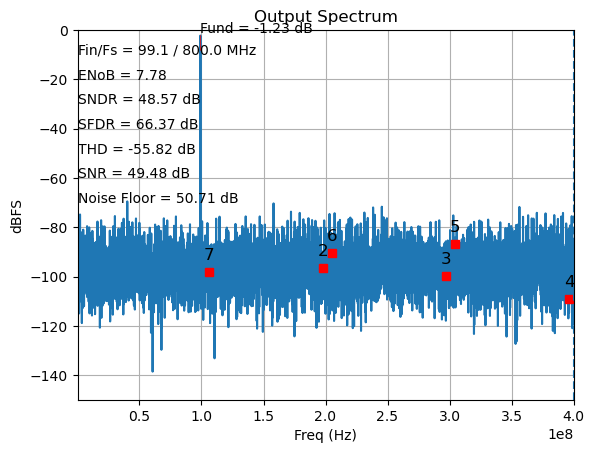

In [4]:
da = RISCA_core(mdl, pr, signal_source(pr, mdl))
test = Analyser(da, pr)
test.mode_analyser()